In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("medical_examination.csv")

In [3]:
# Clean data
df = df[df["ap_lo"] <= df["ap_hi"]]

height_percentile = np.percentile(df.height, 97.5)
df = df[df.height < height_percentile]

weight_low_percentile = np.percentile(df.weight, 2.5)
weight_high_percentile = np.percentile(df.weight, 97.5)
df = df[(df.weight > weight_low_percentile) & (df.weight < weight_high_percentile)]

In [4]:
# Add overweight column
bmi_calc = round(df.weight/((df.height/100)**2), 1)
df['overweight'] = np.where(bmi_calc > 25, 1, 0)

df.sample(10)

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
37998,54245,22562,2,171,86.0,120,90,3,1,1,0,0,0,1
60101,85809,16770,1,170,64.0,110,70,1,1,0,0,1,0,0
15716,22451,19563,2,173,89.0,150,90,2,1,0,1,1,1,1
21009,30005,17739,1,162,69.0,110,80,2,1,0,0,1,0,1
41400,59162,15421,2,174,73.0,120,80,3,1,0,0,1,0,0
50581,72189,19051,1,154,63.0,150,90,2,1,0,0,1,1,1
46914,67001,19609,1,163,55.0,120,80,2,2,0,0,1,1,0
9217,13135,19611,1,158,84.0,140,80,1,3,0,0,1,1,1
38973,55637,20137,1,160,87.0,140,90,1,1,0,0,0,1,1
17003,24305,21000,2,174,86.0,160,100,1,2,0,0,1,0,1


In [5]:
bad_categories = ["cholesterol", "gluc"]
for cat in bad_categories:
    df[cat] = np.where(df[cat] == 1, 0, 1)

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [6]:
df_cat = pd.melt(df, id_vars=["cardio"], value_vars=["active", "alco", "cholesterol", "gluc", "overweight", "smoke"])
df_cat

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0
...,...,...,...
378379,1,smoke,0
378380,1,smoke,0
378381,0,smoke,1
378382,1,smoke,0


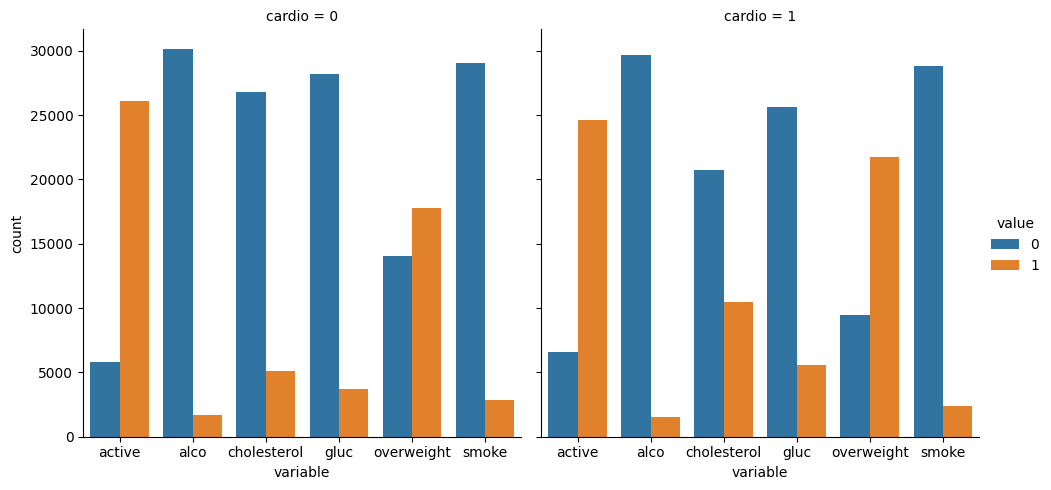

In [7]:
fig = sns.catplot(data=df_cat, kind="count",  x="variable", hue="value", col="cardio")